In [128]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
%matplotlib widget

In [199]:

class Ray:
    def __init__(self, z,y,theta,n):
        self.z = z
        self.y = y
        self.theta = theta
        self.n = n
        
def planar(ray: Ray, z_s: float, n_s: float) -> Ray:
    new_ray = Ray(z_s,                                        # new z is the surface z
                  ray.y + (z_s-ray.z)*np.tan(ray.theta),              # new y is y_1+(z_s-z_1)*theta_1
                  np.arcsin(np.sin(ray.theta) * ray.n / n_s), # new theta is arcsin(n_s/n_1 * sin(theta))
                  n_s)
    return new_ray
    
def curved(ray: Ray, R, z_Rc, n) -> Ray:
    theta_w = np.tan(ray.theta)
    
    a = 1 + theta_w**2
    b = 2 * (theta_w * ray.y - ray.z*theta_w**2 - z_Rc)
    c = z_Rc**2 - 2*theta_w * ray.y * ray.z + ray.y**2 - R**2 + theta_w**2*ray.z
    
    z_c = ( - b + np.sign(R) * np.sqrt(b**2 - 4*a*c)) / (2*a)
    
    theta_R = np.arcsin((ray.y+(z_c-ray.z)*theta_w)/R)
    new_ray = Ray(z = z_c,
                  y = ray.y + (z_c-ray.z) * ray.theta,
                  theta = theta_R - np.arcsin(np.sin(theta_R - ray.theta) * ray.n / n),
                  n = n,
                  )
    return new_ray
    


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
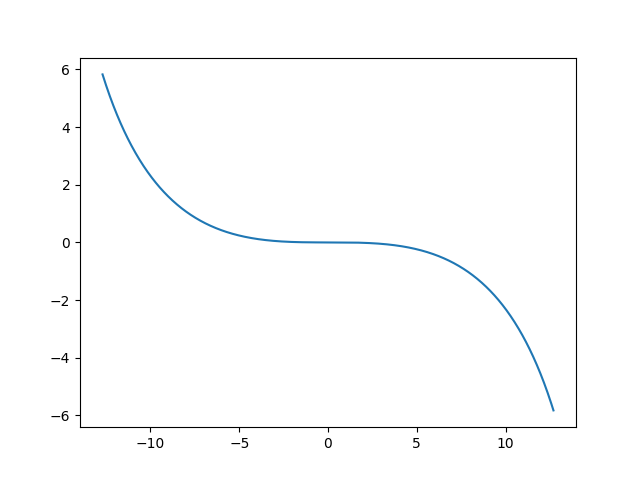

In [216]:
z_Rc = 0
R = 25.8

n_c = 1.55
n_1 = 1

z_1 = 0
theta_1 =0

D = 5.3

f = n_1 / (n_c - n_1) * R
z_f = z_Rc + R + f 

lens_max = 25.4/2

y_1_list = np.linspace(-lens_max,lens_max,1000)

y_values = []

plt.cla()

for y_1 in y_1_list:
    n_1 = 1
    ray_1 = Ray(z_1,y_1,theta_1,n_c)
    ray_2 = curved(ray_1, R, z_Rc, n_1)
    ray_3 = planar(ray_2, z_f, n_1)
    y_values.append(ray_3.y)
    #plt.plot([ray_2.z,ray_3.z],[ray_2.y,ray_3.y])
    
plt.plot(y_1_list, y_values)
#plt.plot(y_1_list, (1-n_c/n_1)*np.power(y_1_list,3) / R**2)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
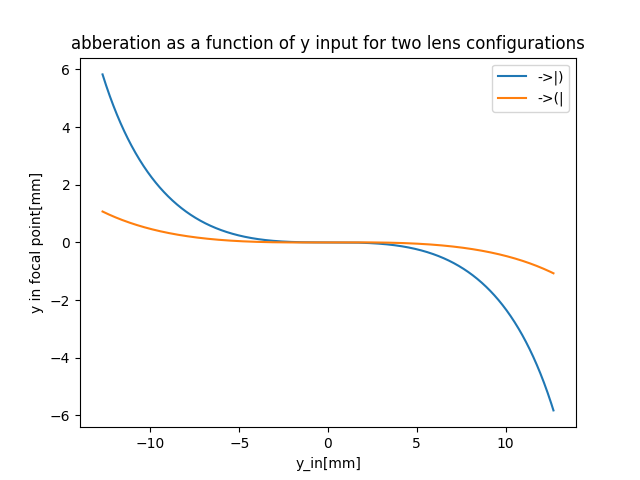

In [179]:
z_Rc = 0
R = 25.8

n_c = 1.55
n_1 = 1

z_1 = -100
theta_1 =0

D = 5.3

f = n_1 / (n_c - n_1) * R
z_end = z_Rc - R + D
z_f = z_Rc - R + f + D/3

lens_max = 25.4/2

y_values = []
y_1_list = np.linspace(-lens_max,lens_max,1000)


#fix, [ax1,ax2] = plt.subplot
for y_1 in y_1_list:
    n_1 = 1
    ray_1 = Ray(z_1,y_1,theta_1,n_1)
    ray_2 = curved(ray_1, -R, z_Rc, n_c)
    ray_3 = planar(ray_2, z_end, n_1)
    ray_4 = planar(ray_3, z_f, n_1)
    y_values.append(ray_4.y)
    #plt.plot([ray_3.z,ray_4.z],[ray_3.y,ray_4.y])

    
#    print(ray_2.theta)
    
plt.plot(y_1_list, y_values)
plt.title("abberation as a function of y input for two lens configurations")
plt.xlabel("y_in[mm]")
plt.ylabel("y in focal point[mm]")
plt.legend(["->|)","->(|"])
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
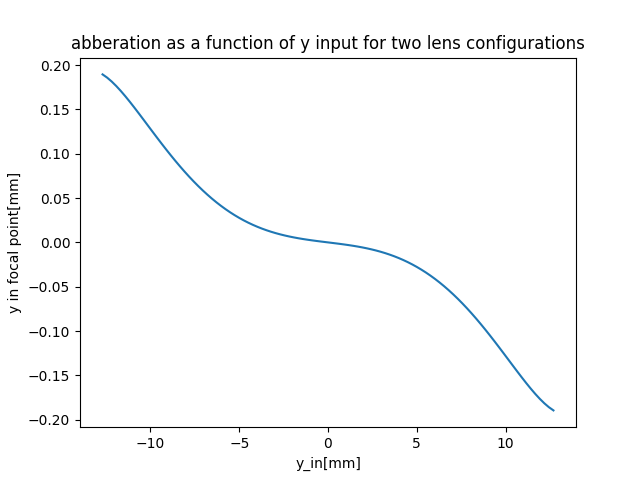

In [221]:
z_R1 = 0
R1 = -34.9
D1 = 9
D2 = 3.5
R2 = 28.8
R3 = 137.5
z_R2 = z_R1 + R1 + D1 - R2
z_R3 = z_R1 + R1 + D1 + D2 - R3

n_1 = 1
n_2 = 1.66708
n_3 = 1.79883

z_1 = -100
theta_1 = 0

f = 43.39 # finish
z_f = z_R3 + R3 + f

lens_max = 25.4/2

y_values = []
y_1_list = np.linspace(-lens_max,lens_max,100)

plt.cla()

#fix, [ax1,ax2] = plt.subplot
for y_1 in y_1_list:
    n_1 = 1
    ray_1 = Ray(z_1,y_1,theta_1,n_1)
    ray_2 = curved(ray_1, R1, z_R1, n_2)
    ray_3 = curved(ray_2, R2, z_R2, n_3)
    ray_4 = curved(ray_3, R3, z_R3, n_1)
    ray_5 = planar(ray_4, z_f, n_1)
    y_values.append(ray_5.y)
    #plt.plot([ray_1.z,ray_2.z,ray_3.z,ray_4.z,ray_5.z],[ray_1.y,ray_2.y,ray_3.y,ray_4.y,ray_5.y])
    #plt.plot([ray_2.z,ray_3.z],[ray_2.y,ray_3.y])
    #plt.plot([ray_4.z,ray_5.z],[ray_4.y,ray_5.y])

    
#    print(ray_2.theta)
    
plt.plot(y_1_list, y_values)
#plt.vlines(z_R1+R1, -10,10)
#plt.vlines(z_R2+R2, -10,10)
#plt.vlines(z_R3+R3, -10,10)
plt.title("abberation as a function of y input for two lens configurations")
plt.xlabel("y_in[mm]")
plt.ylabel("y in focal point[mm]")
plt.show()